In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
from test import load_attr, show_latent, load_model
attr_dir = 'Data/celeba'
tmp = load_attr(attr_dir)

version = 4
model_dir = f'logs/CelebA/VanillaVAE/version_{version}'
model = load_model(model_dir)

attribute file loaded
model loaded


In [9]:
tmp.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [10]:
sampled = tmp.sample(200, random_state=152)
file_name = list(sampled.index)


In [11]:
from test import show_latent
show_latent(file_name, model)

torch.Size([200, 3, 64, 64])


tensor([[ 1.6393,  0.5196, -0.3685,  ..., -1.8905, -0.0069, -0.1366],
        [ 1.4629, -0.9493,  0.2049,  ..., -0.2378, -0.0498,  0.0374],
        [-0.6201, -0.3969, -0.0501,  ..., -0.6558, -0.0066, -0.0239],
        ...,
        [-0.3125,  0.2131, -0.1088,  ..., -0.3598, -0.0226,  0.0248],
        [-1.8590,  0.2541,  0.2120,  ..., -0.1676, -0.0371, -0.0911],
        [-0.2477,  0.8791,  0.1425,  ..., -2.0427, -0.0327, -0.0391]],
       grad_fn=<AddmmBackward0>)

In [12]:
a = show_latent(file_name, model)

torch.Size([200, 3, 64, 64])


In [13]:
a[0]

tensor([ 1.7325e+00,  6.3949e-01,  3.4620e-01,  1.6472e-03,  3.9442e-02,
        -1.7424e-01,  1.4008e-01, -4.1469e-02, -1.7102e-01,  1.3214e-02,
        -1.0089e-01, -3.5840e-01,  5.6767e-02,  1.8712e-01, -3.0944e-02,
        -6.0715e-02, -6.8068e-02,  1.9035e-01, -6.3329e-03, -1.2963e-01,
         7.5334e-02,  8.3132e-01,  5.8511e-01, -9.7182e-02, -2.6525e-02,
         8.8568e-02, -9.8256e-02, -1.1116e-01, -1.6436e-01,  1.8035e-01,
         6.3400e-02, -2.2264e-03,  6.0933e-02,  4.0626e-03,  1.4727e-01,
         8.7681e-02, -1.2685e-01,  6.2877e-01, -3.5804e-05,  4.4065e-02,
         1.1658e-01,  3.9785e-02,  3.5024e-02,  1.4381e-01,  2.5053e-02,
         5.3438e-02,  2.3906e-02, -1.4859e-01, -1.4315e-01,  1.7343e-01,
         1.1266e-01,  5.5243e-01,  5.2144e-02, -2.6248e-02,  6.1261e-02,
         9.2175e-02,  8.0197e-02, -5.3754e-03,  8.2949e-01,  3.8862e-02,
        -1.3284e-01,  2.6223e+00,  1.1968e-01, -1.8540e+00,  9.8397e-02,
        -7.6509e-01,  9.4437e-02,  2.2913e+00, -1.0

In [14]:
a_numpy = a.detach().cpu().numpy()

In [15]:
a_numpy.shape

(200, 128)

In [16]:
a_standardized = (a_numpy - np.mean(a_numpy, axis=0)) / np.std(a_numpy, axis=0)
sampled_labels = sampled.to_numpy()
sampled_labels_std = (sampled_labels - np.mean(sampled_labels, axis=0)) / np.std(sampled_labels, axis=0)

In [17]:
a_standardized

array([[ 1.7429965 ,  0.64162284,  2.3136141 , ..., -0.54308575,
        -0.86426556,  0.01629171],
       [ 1.3641963 , -1.4039801 , -0.355382  , ..., -1.3483466 ,
        -0.8772709 ,  0.8486651 ],
       [-0.56120956, -0.71756786, -0.17490102, ..., -0.67064893,
         0.49484667,  0.15639983],
       ...,
       [ 0.08341102,  0.6539945 ,  0.43535215, ..., -0.7694121 ,
         0.47778183, -0.15078227],
       [-1.7542297 , -0.34169003, -0.6089364 , ..., -0.23014806,
         1.0301261 , -0.20761855],
       [-0.19652775,  0.9558846 ,  1.0347213 , ..., -2.0237663 ,
         0.07412331, -0.02159583]], dtype=float32)

## A correlation

In [22]:
a_self_corr = a_standardized.T @ a_standardized
a_self_corr

array([[199.99995  ,  20.290745 ,  11.577706 , ...,  -8.19982  ,
        -10.686969 ,   9.294987 ],
       [ 20.290745 , 199.99997  ,  25.407537 , ...,  14.228185 ,
         -1.7740799,  -2.9519033],
       [ 11.577706 ,  25.407537 , 200.00017  , ..., -19.448696 ,
         31.806112 ,  11.63357  ],
       ...,
       [ -8.19982  ,  14.228185 , -19.448696 , ..., 199.99998  ,
         -8.182231 ,   2.3053648],
       [-10.686969 ,  -1.7740799,  31.806112 , ...,  -8.182231 ,
        200.00003  , -24.92559  ],
       [  9.294987 ,  -2.9519033,  11.63357  , ...,   2.3053648,
        -24.92559  , 200.0001   ]], dtype=float32)

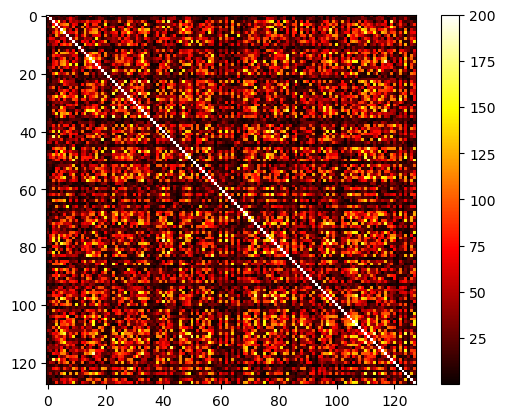

In [24]:
plt.imshow(np.abs(a_self_corr), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

## Correlation with the existing code

In [19]:
corr = a_standardized.T @ sampled_labels_std
corr

array([[ 33.02025878, -21.32122035, -24.63514095, ..., -25.71867131,
         10.52992349, -18.73395349],
       [  4.63344579,   2.29441024, -20.56765944, ...,  -4.33680743,
          1.44163009,  20.68806089],
       [-27.67962109,  28.12374509, -17.06916842, ...,  17.98537824,
        -12.45006198, -28.76879447],
       ...,
       [ 47.62599398,  -4.41895099,   0.37941887, ..., -26.70608589,
         15.65873663,  11.19223634],
       [  0.89341417,  15.88484911, -29.63809715, ...,   3.21234446,
         -7.8221613 ,   0.96136286],
       [ 33.51236656,  17.61937731,  -1.97906827, ...,   5.32769497,
          5.92926263,  -9.60471962]])

In [20]:
np.mean(np.abs(corr))

13.584641580016898

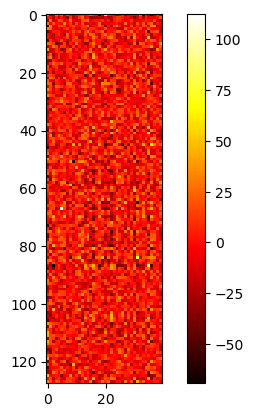

In [21]:
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
np.argwhere(corr > 65)

array([[67,  5],
       [87, 35]])

In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

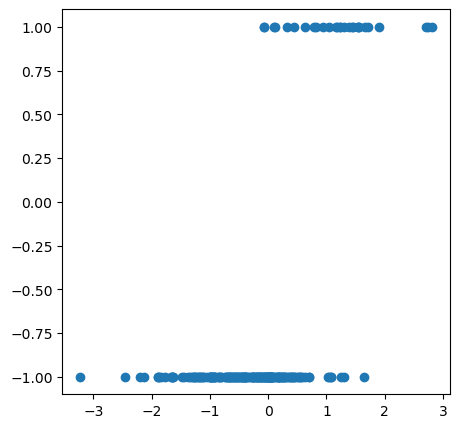

In [ ]:
def visualize_latent(latent: list, attr: pd.DataFrame):
    '''
    given a list of latent vectors and the attribute file, 
    visualize the latent vectors with respect to attributes

    Parameters
        latent: list of latent vectors
        attr: attribute file

    Returns
        None
    '''
    # generate dummy data
    latent = a.detach().cpu().numpy()
     
    # visualize the latent vectors with respect to attributes
    # draw scatter plots
    plt.figure(figsize=(5, 5))
    plt.scatter(latent[:, 67], sampled_labels[:, 5])
    plt.show()

    pass

visualize_latent([], sampled)


In [ ]:
# get unique values of each attribute
unique_values = {}
for col in sampled.columns:
    unique_values[col] = sampled[col].unique()
unique_values

{'5_o_Clock_Shadow': array([-1,  1]),
 'Arched_Eyebrows': array([-1,  1]),
 'Attractive': array([ 1, -1]),
 'Bags_Under_Eyes': array([-1,  1]),
 'Bald': array([-1,  1]),
 'Bangs': array([ 1, -1]),
 'Big_Lips': array([-1,  1]),
 'Big_Nose': array([-1,  1]),
 'Black_Hair': array([ 1, -1]),
 'Blond_Hair': array([-1,  1]),
 'Blurry': array([-1,  1]),
 'Brown_Hair': array([-1,  1]),
 'Bushy_Eyebrows': array([-1,  1]),
 'Chubby': array([-1,  1]),
 'Double_Chin': array([-1,  1]),
 'Eyeglasses': array([-1,  1]),
 'Goatee': array([-1,  1]),
 'Gray_Hair': array([-1,  1]),
 'Heavy_Makeup': array([ 1, -1]),
 'High_Cheekbones': array([-1,  1]),
 'Male': array([-1,  1]),
 'Mouth_Slightly_Open': array([-1,  1]),
 'Mustache': array([-1,  1]),
 'Narrow_Eyes': array([-1,  1]),
 'No_Beard': array([ 1, -1]),
 'Oval_Face': array([ 1, -1]),
 'Pale_Skin': array([ 1, -1]),
 'Pointy_Nose': array([-1,  1]),
 'Receding_Hairline': array([-1,  1]),
 'Rosy_Cheeks': array([-1,  1]),
 'Sideburns': array([-1,  1]),
 '